# E-commerce Project 1
## Project Task: Week 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Capston Project/Pro 1/Project 1-Ecommerce-Datasets.zip','/content/sample_data')

In [5]:
#importing libraries
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

In [6]:
#reading the data
train_csv = pd.read_csv('/content/sample_data/Ecommerce/train_data.csv') 
test_csv = pd.read_csv('/content/sample_data/Ecommerce/test_data.csv')

In [7]:
train_csv.head(5)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [8]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [9]:
train_csv.isna().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [10]:
train_csv['reviews.title'].mode()[0]

'Great tablet'

In [11]:
train_csv[['reviews.title']] = train_csv[['reviews.title']].apply(lambda x: x.replace(np.nan,train_csv['reviews.title'].mode()[0]))

In [12]:
train_csv.isna().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        0
sentiment            0
dtype: int64

### 2. EDA
#### 2.1 See what a positive, negative, and neutral review looks like

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

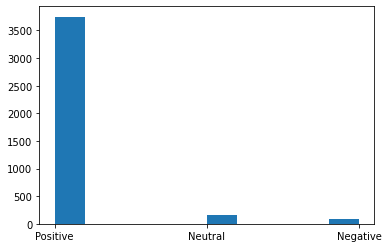

In [14]:
plt.hist(train_csv['sentiment']);

In [15]:
train_csv['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

#### 2.2 Check the class count for each class. It’s a class imbalance problem

In [16]:
train_csv['reviews.text']

0       Purchased on Black FridayPros - Great Price (e...
1       I purchased two Amazon in Echo Plus and two do...
2       Just an average Alexa option. Does show a few ...
3       very good product. Exactly what I wanted, and ...
4       This is the 3rd one I've purchased. I've bough...
                              ...                        
3995    It‚Äôs fun for the family to play with, but it...
3996    I love the Kindle, it is a great product. It r...
3997    I was looking for a blutooth speaker to use wi...
3998    This is the second Amazon Fire 7 tablet I have...
3999    very satisfied with tablet, very fast and effi...
Name: reviews.text, Length: 4000, dtype: object

In [17]:
le =  LabelEncoder()

In [18]:
le.fit_transform(train_csv['sentiment'])

array([2, 2, 1, ..., 2, 2, 2])

In [19]:
le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [20]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [21]:
#stopword removal and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [22]:
new_train = []

In [23]:
#text pre processing
for i in train_csv['reviews.text']:
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    new_train.append(review)

In [24]:
new_train[1]

'purchased two amazon echo plus two dot plus four fire stick hub philip hue lamp family christmas happy purchase learning much alexa start daily routine alexa program whatever would like include news weather music horoscope also start day compliment think important alexa gave best chili recipe mean best called chili want husband use alexa stay organized business date reminder way go'

In [25]:
new_clean_reviews_df = pd.DataFrame({'new_clean_reviews': new_train})

In [26]:
train_csv =pd.concat([train_csv,new_clean_reviews_df],axis = 1)

In [27]:
train_csv.head(5)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,new_clean_reviews
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,purchased black fridaypros great price even sa...
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,purchased two amazon echo plus two dot plus fo...
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral,average alexa option show thing screen still l...
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,good product exactly wanted good price
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,rd one purchased bought one niece case compare...


In [28]:
feature = train_csv[['new_clean_reviews']]
target = train_csv[['sentiment']]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(feature, target,random_state = 101)

In [31]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3000, 1) (1000, 1) (3000, 1) (1000, 1)


In [32]:
x_train['new_clean_reviews']

3851    using amazon echo show couple day work great m...
3425    echo plus offer much smart home however dot lo...
2621    best buy associate explained product well easy...
230     hesitant purchasing new echo glad really like ...
1965    great way get kid introduced using tablet ton ...
                              ...                        
1599    need definitely get memory card enough memory ...
3910    store representative took time choose right si...
1361    give great answer connection great exchanging ...
1547    granddaughter really like found age appropriat...
863                        bought gift far know work fine
Name: new_clean_reviews, Length: 3000, dtype: object

### 4. Convert the reviews in Tf-Idf score.

In [33]:
#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(x_train['new_clean_reviews'])

In [34]:
print("n_samples: %d, n_features: %d" % X_train_tf.shape) #n_features means unique words

n_samples: 3000, n_features: 3706


In [35]:
#transforming test data into tf-idf matrix
X_test_tf = tf_idf.transform(x_test['new_clean_reviews'])

In [36]:
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 1000, n_features: 3706


In [37]:
y_train_transform = le.transform(y_train)
y_test_transform = le.transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
np.unique(y_train_transform)

array([0, 1, 2])

### 5. Run multinomial Naive Bayes classifier

In [39]:
#naive bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train_transform)

MultinomialNB()

In [40]:
#predicted y
y_pred = naive_bayes_classifier.predict(X_test_tf)

In [41]:
np.unique(y_pred),y_pred.shape

(array([2]), (1000,))

#### 5.1 Everything will be classified as positive because of the class imbalance

In [42]:
le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [43]:
print(metrics.classification_report(y_test_transform, y_pred, target_names= le.classes_))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        23
     Neutral       0.00      0.00      0.00        42
    Positive       0.94      1.00      0.97       935

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.87      0.94      0.90      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. Tackling Class Imbalance Problem:

In [44]:
count_positive, count_neutral, count_negative = train_csv['sentiment'].value_counts()

In [45]:
df_positive = train_csv[train_csv['sentiment'] == 'Positive']
df_neutral = train_csv[train_csv['sentiment'] == 'Neutral']
df_negative = train_csv[train_csv['sentiment'] == 'Negative']

In [46]:
df_positive.shape

(3749, 9)

In [47]:
df_neutral.shape

(158, 9)

In [48]:
df_negative.shape

(93, 9)

In [49]:
print(df_positive.sample(count_negative).shape)
print(df_neutral.sample(count_negative).shape)

(93, 9)
(93, 9)


In [50]:
df_positive_under = df_positive.sample(count_negative)
df_neutral_under = df_neutral.sample(count_negative)

#### Method 1- Undersampling

In [51]:
df_under = pd.concat([df_positive_under,df_neutral_under,df_negative],ignore_index=True)

In [52]:
df_under[['sentiment']].value_counts()

sentiment
Negative     93
Neutral      93
Positive     93
dtype: int64

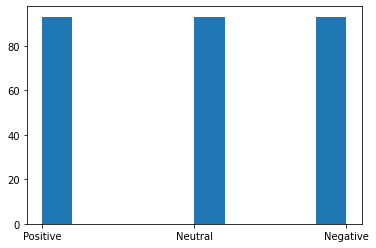

In [53]:
plt.hist(df_under['sentiment']);

In [54]:
feature = df_under[['new_clean_reviews']]
target = df_under[['sentiment']]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(feature, target,random_state = 101)

In [57]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(209, 1) (70, 1) (209, 1) (70, 1)


In [58]:
x_train['new_clean_reviews']

95     device good entry level reader daylight doesno...
262    bought tablet son like touch screen poor quali...
90     senior citizen great computer tablet therefore...
145                        lot memory dy fast great game
278    owning kid samsung seems confusing navigate al...
                             ...                        
40     lazy man drean combined alexa get harmony hub ...
75     powerful tablet needed something view netflix ...
87     needed device listen book long drive paired ea...
63            easy use super light make book read effort
11     got laptop bound college student best option f...
Name: new_clean_reviews, Length: 209, dtype: object

In [59]:
X_train_tf = tf_idf.transform(x_train['new_clean_reviews'])

In [60]:
print("n_samples: %d, n_features: %d" % X_train_tf.shape) #n_features means unique words

n_samples: 209, n_features: 3706


In [61]:
#transforming test data into tf-idf matrix
X_test_tf = tf_idf.transform(x_test['new_clean_reviews'])

In [62]:
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 70, n_features: 3706


In [63]:
y_train_transform = le.transform(y_train)
y_test_transform = le.transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
naive_bayes_classifier.fit(X_train_tf, y_train_transform)

MultinomialNB()

In [65]:
#predicted y
y_pred = naive_bayes_classifier.predict(X_test_tf)

In [66]:
y_pred

array([2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2,
       0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2,
       0, 2, 2, 1])

In [67]:
y_test_transform

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2,
       1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2,
       0, 2, 2, 2])

In [68]:
print(metrics.classification_report(y_test_transform, y_pred, target_names= le.classes_))

              precision    recall  f1-score   support

    Negative       0.75      0.44      0.56        27
     Neutral       0.38      0.48      0.43        21
    Positive       0.54      0.68      0.60        22

    accuracy                           0.53        70
   macro avg       0.56      0.53      0.53        70
weighted avg       0.57      0.53      0.53        70



#### Conclusion - See the f-score is increase by undersampling

#### 6.1 Test the model on unseen data

In [69]:
test_csv_non = test_csv['reviews.text']

In [70]:
test_csv_clean = []

In [71]:
#text pre processing
for i in test_csv_non:
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    test_csv_clean.append(review)

In [72]:
test_csv_tf = tf_idf.transform(test_csv_clean)

In [73]:
y_preds_test_csv = naive_bayes_classifier.predict(test_csv_tf)

In [74]:
test_csv_non[3]

'I use mine for email, Facebook ,games and to go on line. I also have down loaded books. I use it to take photos. It is small and be taken easily. I would recommend it to anyone .'

In [75]:
y_preds_test_csv

array([0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1,
       1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2,

#### Method 2- Oversampling

In [76]:
count_positive, count_neutral, count_negative = train_csv['sentiment'].value_counts()

In [77]:
df_positive = train_csv[train_csv['sentiment'] == 'Positive']
df_neutral = train_csv[train_csv['sentiment'] == 'Neutral']
df_negative = train_csv[train_csv['sentiment'] == 'Negative']

In [78]:
df_positive.shape

(3749, 9)

In [79]:
df_neutral.shape

(158, 9)

In [80]:
df_negative.shape

(93, 9)

In [81]:
print(df_neutral.sample(count_positive,replace= True).shape)
print(df_negative.sample(count_positive, replace= True).shape)

(3749, 9)
(3749, 9)


In [82]:
df_neutral_over = df_neutral.sample(count_positive,replace= True)
df_negative_over = df_negative.sample(count_positive, replace= True)

In [83]:
df_over = pd.concat([df_positive,df_neutral_over,df_negative_over],ignore_index=True)

In [84]:
df_over.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,new_clean_reviews
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,purchased black fridaypros great price even sa...
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,purchased two amazon echo plus two dot plus fo...
2,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,good product exactly wanted good price
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,rd one purchased bought one niece case compare...
4,"Kindle E-reader - White, 6 Glare-Free Touchscr...",Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",2016-12-23T00:00:00.000Z,This is a great product. Light weight. I wish ...,You will love it,Positive,great product light weight wish wifi download ...


In [85]:
df_over[['sentiment']].value_counts()

sentiment
Negative     3749
Neutral      3749
Positive     3749
dtype: int64

In [86]:
feature = df_over[['new_clean_reviews']]
target = df_over[['sentiment']]

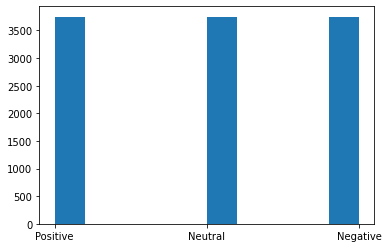

In [87]:
plt.hist(df_over['sentiment']);

In [88]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,random_state=100,shuffle=True)

In [89]:
x_train['new_clean_reviews']

9653    prior using device decided recharge shocked fi...
6272    happy first battery totally dead got however c...
2133    visuals entice utilizing product greater frequ...
9215    le useless work amazon cloudcam purchased best...
1683    husband year really enjoys spending time kindl...
                              ...                        
350     product tie amazon ecosystem better dot echo p...
79      love echo show much easy use connects mobil ph...
8039    bought gift adult kid video chat college secon...
6936    decent little tablet game player tablet shuts ...
5640    show nice feature audio quality best price poi...
Name: new_clean_reviews, Length: 8435, dtype: object

In [90]:
X_train_tf = tf_idf.transform(x_train['new_clean_reviews'])

In [91]:
print("n_samples: %d, n_features: %d" % X_train_tf.shape) #n_features means unique words

n_samples: 8435, n_features: 3706


In [92]:
#transforming test data into tf-idf matrix
X_test_tf = tf_idf.transform(x_test['new_clean_reviews'])

In [93]:
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 2812, n_features: 3706


In [94]:
y_train_transform = le.transform(y_train)
y_test_transform = le.transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
naive_bayes_classifier.fit(X_train_tf, y_train_transform)

MultinomialNB()

In [96]:
#predicted y
y_pred = naive_bayes_classifier.predict(X_test_tf)

In [97]:
y_pred.shape

(2812,)

In [98]:
y_test_transform.shape

(2812,)

In [99]:
print(metrics.classification_report(y_test_transform, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.97      1.00      0.99       943
     Neutral       0.93      0.99      0.96       939
    Positive       0.99      0.90      0.94       930

    accuracy                           0.96      2812
   macro avg       0.96      0.96      0.96      2812
weighted avg       0.96      0.96      0.96      2812



#### Conclusion - By oversampling the f-score is incease more as compair to Undersampling

#### Test model on unseen data

In [100]:
y_preds_test_csv = naive_bayes_classifier.predict(test_csv_tf)

In [101]:
test_csv_non[21]

'Needs to be a stand alone device. I should have not required to use a tablet of Cell phone to make it work. Amazon needs to work on the technology on device.'

In [102]:
le.classes_[y_preds_test_csv[21]]

'Negative'

In [103]:
test_data_hidden = pd.read_csv('/content/sample_data/Ecommerce/test_data_hidden.csv')

In [104]:
test_data_hidden.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [105]:
test_data_hidden['reviews.text'][21]

'Needs to be a stand alone device. I should have not required to use a tablet of Cell phone to make it work. Amazon needs to work on the technology on device.'

In [106]:
test_data_hidden['sentiment'][21]

'Negative'

In [107]:
le.classes_[y_preds_test_csv[581]]

'Neutral'

In [108]:
test_data_hidden['sentiment'][581]

'Neutral'

### **From above two observation we can conclude that the model is performing well on unseeen data. It is giving correct prediction by comparing it with hidden data.**

### Use Tree-based classifiers like Random Forest and XGBoost.

#### Let's try new classifiers so that we can get more better result's

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
clr2 = RandomForestClassifier()

In [111]:
random_forest = clr2.fit(X_train_tf,y_train_transform)

In [112]:
y_preds_random_forest = random_forest.predict(X_test_tf)

In [113]:
print(metrics.classification_report(y_test_transform, y_preds_random_forest, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       943
     Neutral       1.00      1.00      1.00       939
    Positive       1.00      1.00      1.00       930

    accuracy                           1.00      2812
   macro avg       1.00      1.00      1.00      2812
weighted avg       1.00      1.00      1.00      2812



In [114]:
le.classes_[y_preds_test_csv[581]]

'Neutral'

In [115]:
test_data_hidden['sentiment'][581]

'Neutral'

#### Conclusion - Randomforest perform well as compair to Naive Based classifier

In [116]:
from xgboost import XGBClassifier

In [117]:
clf2 = XGBClassifier()

In [118]:
xg_boost = clf2.fit(X_train_tf,y_train_transform)

In [119]:
y_preds_xg_boost = xg_boost.predict(X_test_tf)

In [ ]:
print(metrics.classification_report(y_test_transform, y_preds_xg_boost, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.97      0.98      0.98       943
     Neutral       0.87      0.93      0.90       939
    Positive       0.93      0.84      0.88       930

    accuracy                           0.92      2812
   macro avg       0.92      0.92      0.92      2812
weighted avg       0.92      0.92      0.92      2812



### **We can conclude among all the classifers Random Forest classifer perfomance is best by evaluating with precision,recall, f1-score.**

# **Project Task: Week 2**

### 1. Import required libreries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,GRU
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
import re

In [ ]:
textPos=df_over[df_over.sentiment=="Positive"].new_clean_reviews

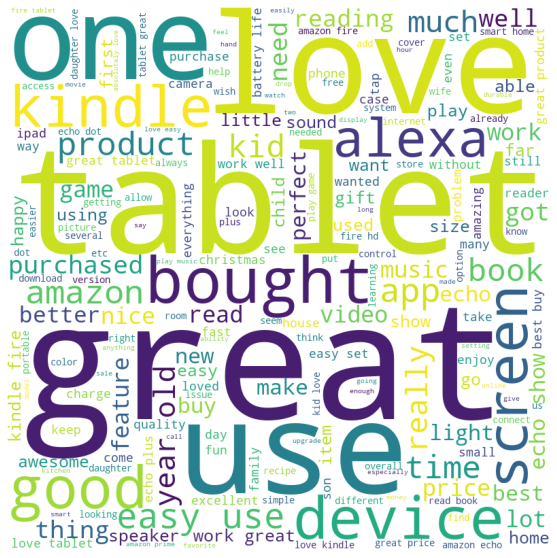

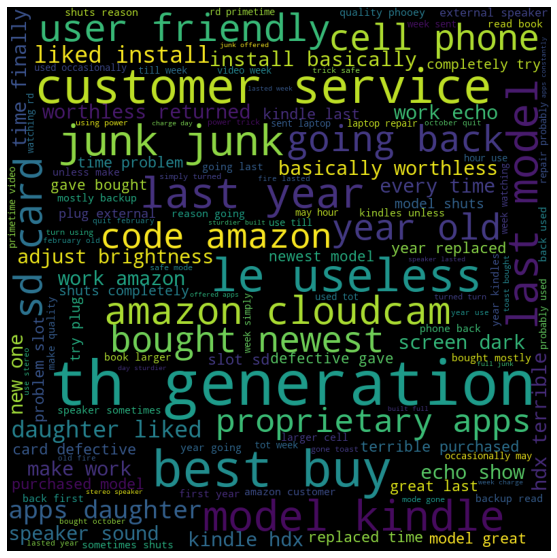

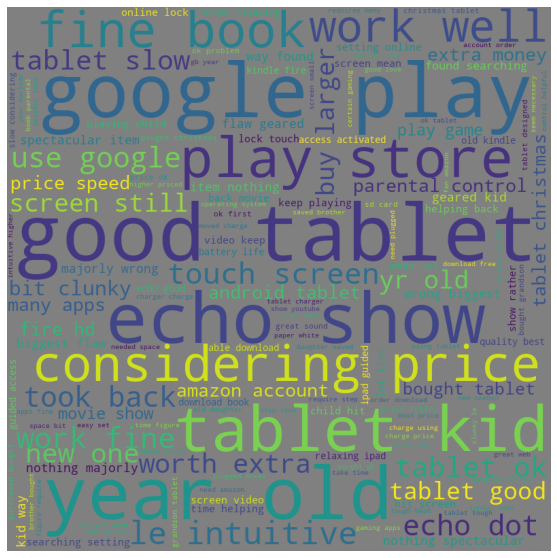

In [ ]:
from wordcloud import WordCloud, STOPWORDS

textPos=df_over[df_over.sentiment=="Positive"].new_clean_reviews
textNeg=df_over[df_over.sentiment=="Negative"].new_clean_reviews
textNeu=df_over[df_over.sentiment=="Neutral"].new_clean_reviews



from matplotlib import pyplot as plt
wordcloud_pos=WordCloud(width=800,height=800,background_color="white",stopwords=set(STOPWORDS),min_font_size=10).generate_from_text(' '.join(textPos))
wordcloud_neg=WordCloud(width=800,height=800,background_color="black",stopwords=set(STOPWORDS),min_font_size=10).generate_from_text(' '.join(textNeg))
wordcloud_neu=WordCloud(width=800,height=800,background_color="gray",stopwords=set(STOPWORDS),min_font_size=10).generate_from_text(' '.join(textNeu))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_neu)
plt.axis('off')
plt.show()

In [ ]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df_over['new_clean_reviews'].values)

In [ ]:
tokenizer.word_index

{'tablet': 1,
 'amazon': 2,
 'great': 3,
 'use': 4,
 'bought': 5,
 'one': 6,
 'good': 7,
 'work': 8,
 'kindle': 9,
 'echo': 10,
 'would': 11,
 'love': 12,
 'device': 13,
 'apps': 14,
 'get': 15,
 'time': 16,
 'year': 17,
 'like': 18,
 'buy': 19,
 'screen': 20,
 'kid': 21,
 'product': 22,
 'show': 23,
 'old': 24,
 'price': 25,
 'alexa': 26,
 'book': 27,
 'easy': 28,
 'thing': 29,
 'could': 30,
 'quality': 31,
 'best': 32,
 'game': 33,
 'first': 34,
 'better': 35,
 'purchased': 36,
 'fire': 37,
 'play': 38,
 'much': 39,
 'sound': 40,
 'need': 41,
 'make': 42,
 'back': 43,
 'video': 44,
 'read': 45,
 'well': 46,
 'speaker': 47,
 'ipad': 48,
 'also': 49,
 'using': 50,
 'model': 51,
 'new': 52,
 'charge': 53,
 'still': 54,
 'last': 55,
 'week': 56,
 'really': 57,
 'store': 58,
 'slow': 59,
 'set': 60,
 'day': 61,
 'light': 62,
 'got': 63,
 'problem': 64,
 'able': 65,
 'music': 66,
 'used': 67,
 'little': 68,
 'google': 69,
 'generation': 70,
 'purchase': 71,
 'daughter': 72,
 'reading': 73,

In [ ]:
df_over.new_clean_reviews.head()

0    purchased black fridaypros great price even sa...
1    purchased two amazon echo plus two dot plus fo...
2               good product exactly wanted good price
3    rd one purchased bought one niece case compare...
4    great product light weight wish wifi download ...
Name: new_clean_reviews, dtype: object

In [ ]:
df_over["noofwords"]=df_over.new_clean_reviews.apply(lambda x:len(x.split()))

In [ ]:
df_over.noofwords.describe()

count    11247.000000
mean        18.306571
std         18.038276
min          1.000000
25%          7.000000
50%         12.000000
75%         24.000000
max        708.000000
Name: noofwords, dtype: float64

In [ ]:
X = tokenizer.texts_to_sequences(df_over['new_clean_reviews'].values)
X[0:5]

[[36,
  286,
  3,
  25,
  206,
  233,
  721,
  184,
  1924,
  1925,
  1362,
  360,
  2,
  261,
  2,
  41,
  1,
  613,
  271,
  178,
  232,
  14,
  452,
  6,
  2,
  147,
  65,
  271,
  69,
  38,
  3,
  1,
  111],
 [36,
  133,
  2,
  10,
  151,
  133,
  175,
  151,
  1420,
  37,
  473,
  325,
  755,
  378,
  1440,
  335,
  98,
  92,
  71,
  372,
  39,
  26,
  694,
  1038,
  1926,
  26,
  234,
  1471,
  11,
  18,
  1538,
  681,
  420,
  66,
  49,
  694,
  61,
  1927,
  367,
  1441,
  26,
  235,
  32,
  594,
  481,
  32,
  443,
  105,
  249,
  4,
  26,
  649,
  1494,
  1363,
  1495,
  147,
  148],
 [7, 22, 689, 90, 7, 25],
 [373, 6, 36, 5, 6, 464, 157, 803, 6, 1375, 1020, 1, 118, 16, 1539],
 [3, 22, 62, 968, 135, 321, 89, 130]]

In [ ]:
X = pad_sequences(X,maxlen=20)

In [ ]:
X[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   7,  22, 689,  90,   7,  25], dtype=int32)

In [ ]:
! pip install textblob
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_over['calculated'] = df_over['new_clean_reviews'].apply(lambda x: (TextBlob(x).sentiment.polarity))
df_over.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,new_clean_reviews,calculated
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,purchased black fridaypros great price even sa...,0.433333
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,purchased two amazon echo plus two dot plus fo...,0.441071
2,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,good product exactly wanted good price,0.550000
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,rd one purchased bought one niece case compare...,0.500000
4,"Kindle E-reader - White, 6 Glare-Free Touchscr...",Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",2016-12-23T00:00:00.000Z,This is a great product. Light weight. I wish ...,You will love it,Positive,great product light weight wish wifi download ...,0.600000


In [ ]:
X.shape

(11247, 20)

In [ ]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(256, input_dim=X.shape[1], activation='relu'))
model.add(Dense(512, input_dim=X.shape[1], activation='relu'))
model.add(Dense(512, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1024, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1024, input_dim=X.shape[1], activation='relu'))
model.add(Dense(3, activation='softmax'))


# Compile model
# Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy',Precision(), Recall()])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 8)                 168       
                                                                 
 dense_29 (Dense)            (None, 16)                144       
                                                                 
 dense_30 (Dense)            (None, 32)                544       
                                                                 
 dense_31 (Dense)            (None, 64)                2112      
                                                                 
 dense_32 (Dense)            (None, 128)               8320      
                                                                 
 dense_33 (Dense)            (None, 256)               33024     
                                                                 
 dense_34 (Dense)            (None, 512)             

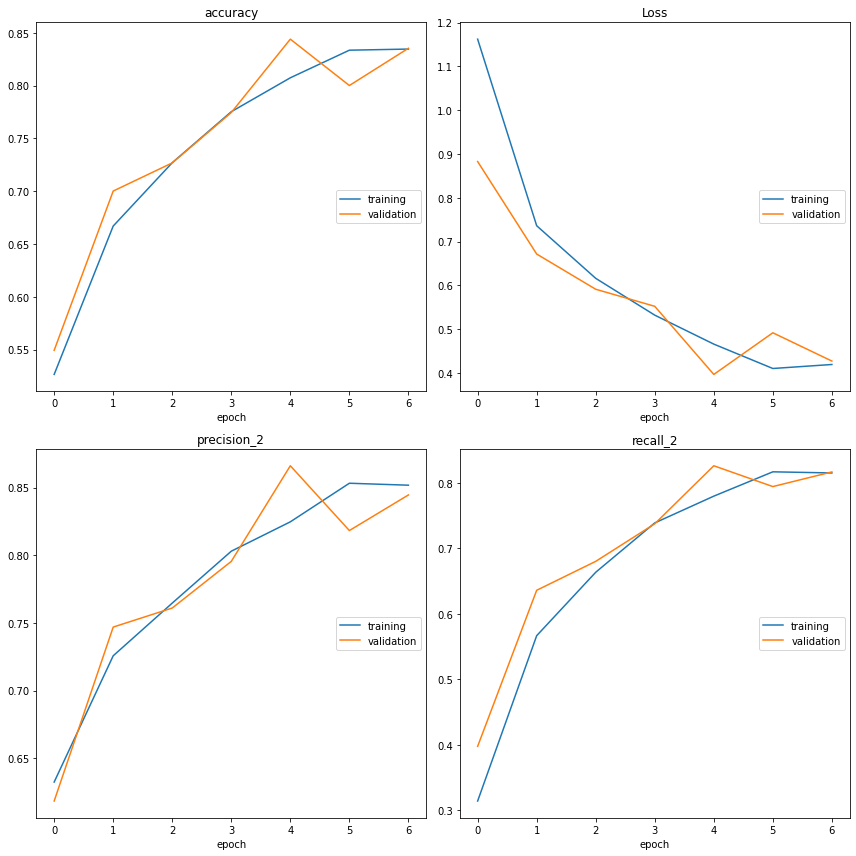

accuracy
	training         	 (min:    0.526, max:    0.835, cur:    0.835)
	validation       	 (min:    0.549, max:    0.844, cur:    0.835)
Loss
	training         	 (min:    0.410, max:    1.162, cur:    0.419)
	validation       	 (min:    0.397, max:    0.883, cur:    0.427)
precision_2
	training         	 (min:    0.632, max:    0.853, cur:    0.852)
	validation       	 (min:    0.618, max:    0.866, cur:    0.845)
recall_2
	training         	 (min:    0.314, max:    0.817, cur:    0.815)
	validation       	 (min:    0.398, max:    0.826, cur:    0.817)

Epoch 7: saving model to model_weights.h5

Epoch 7: val_loss did not improve from 0.39668
Restoring model weights from the end of the best epoch: 5.
236/236 [==============================] - 2s 9ms/step - loss: 0.4194 - accuracy: 0.8346 - precision_2: 0.8518 - recall_2: 0.8153 - val_loss: 0.4272 - val_accuracy: 0.8354 - val_precision_2: 0.8446 - val_recall_2: 0.8168 - lr: 0.0010
Epoch 7: early stopping


In [ ]:
epochs = 10
batch_size = 32

checkpoint = tf.keras.callbacks.ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                            save_weights_only = True,
                            mode = 'max',
                            verbose = 1)

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 2,
                          mode = 'max',
                          verbose = 1,
                          restore_best_weights = True)

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint("model.h5", monitor='val_loss', verbose=1, save_best_only=True)


callbacks = [PlotLossesKerasTF(),checkpoint, lr_reducer, checkpointer, earlystop]

history = model.fit(
    X_train,Y_train,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    validation_data=(X_test ,Y_test))

In [ ]:
le.classes_[model.predict(X_test).astype(int)]

array([['Negative', 'Negative', 'Negative'],
       ['Negative', 'Negative', 'Negative'],
       ['Negative', 'Negative', 'Negative'],
       ...,
       ['Negative', 'Negative', 'Negative'],
       ['Negative', 'Negative', 'Negative'],
       ['Negative', 'Negative', 'Negative']], dtype=object)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# create model
model = Sequential()
model.add(clf)
model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(256, input_dim=X.shape[1], activation='relu'))
model.add(Dense(512, input_dim=X.shape[1], activation='relu'))
model.add(Dense(512, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1024, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1024, input_dim=X.shape[1], activation='relu'))
model.add(Dense(3, activation='softmax'))


# Compile model
# Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy',Precision(), Recall()])

model.summary()

TypeError: ignored

In [ ]:
# Pay attention to the name of the second step, i. e. 'model'
pipeline = Pipeline(steps=[
     ('preprocess', preprocess),
     ('model', Lasso())
])

# Define the parameter grid to be used in GridSearch
param_grid = {'model__alpha': np.arange(0, 1, 0.05)}

search = GridSearchCV(pipeline, param_grid)
search.fit(X_train, y_train)

NameError: ignored

In [ ]:
embed_dim = 200
lstm_out = 196

model1 = Sequential()
model1.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model1.add(LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.3))
model1.add(Dense(3,activation='softmax'))
# Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
model1.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy',Precision(), Recall()])
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 200)           400000    
                                                                 
 lstm_2 (LSTM)               (None, 196)               311248    
                                                                 
 dense_4 (Dense)             (None, 3)                 591       
                                                                 
Total params: 711,839
Trainable params: 711,839
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(df_over['sentiment']).values
Y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7535, 20) (7535, 3)
(3712, 20) (3712, 3)


In [ ]:
! pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 38.2 MB/s 
     |████████████████████████████████| 381 kB 73.8 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [ ]:
from livelossplot import PlotLossesKerasTF
import tensorflow as tf

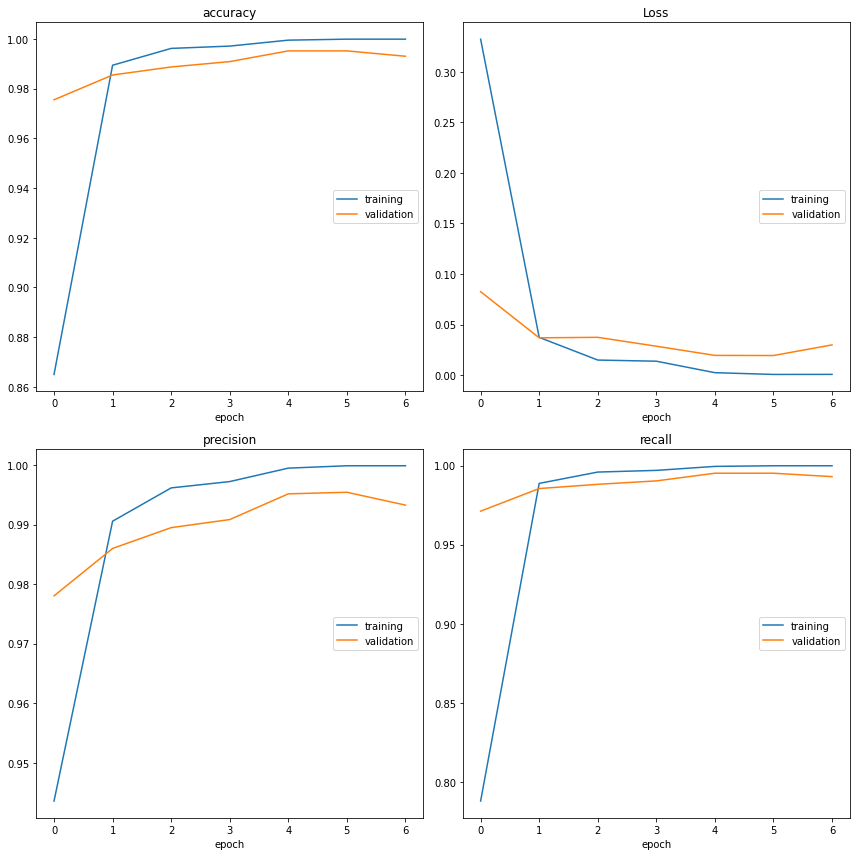

accuracy
	training         	 (min:    0.865, max:    1.000, cur:    1.000)
	validation       	 (min:    0.975, max:    0.995, cur:    0.993)
Loss
	training         	 (min:    0.001, max:    0.332, cur:    0.001)
	validation       	 (min:    0.019, max:    0.083, cur:    0.030)
precision
	training         	 (min:    0.944, max:    1.000, cur:    1.000)
	validation       	 (min:    0.978, max:    0.995, cur:    0.993)
recall
	training         	 (min:    0.788, max:    1.000, cur:    1.000)
	validation       	 (min:    0.971, max:    0.995, cur:    0.993)

Epoch 7: saving model to model1_weights.h5

Epoch 7: val_loss did not improve from 0.01949
Restoring model weights from the end of the best epoch: 5.
236/236 [==============================] - 23s 99ms/step - loss: 8.4910e-04 - accuracy: 0.9999 - precision: 0.9999 - recall: 0.9999 - val_loss: 0.0300 - val_accuracy: 0.9930 - val_precision: 0.9933 - val_recall: 0.9930 - lr: 0.0010
Epoch 7: early stopping


In [ ]:
epochs = 10
batch_size = 32

checkpoint = tf.keras.callbacks.ModelCheckpoint("model1_weights.h5", monitor='val_accuracy',
                            save_weights_only = True,
                            mode = 'max',
                            verbose = 1)

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 2,
                          mode = 'max',
                          verbose = 1,
                          restore_best_weights = True)

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint("model1.h5", monitor='val_loss', verbose=1, save_best_only=True)


callbacks = [PlotLossesKerasTF(),checkpoint, lr_reducer, checkpointer, earlystop]

history = model1.fit(
    X_train,Y_train,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    validation_data=(X_test ,Y_test))

In [ ]:
train_pred=model1.predict(X_train).argmax(axis=1)
test_pred=model1.predict(X_test).argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_train.argmax(axis=1),train_pred,target_names = le.classes_))
print(classification_report(Y_test.argmax(axis=1),test_pred,target_names = le.classes_))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2526
     Neutral       1.00      1.00      1.00      2519
    Positive       1.00      1.00      1.00      2490

    accuracy                           1.00      7535
   macro avg       1.00      1.00      1.00      7535
weighted avg       1.00      1.00      1.00      7535

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      1223
     Neutral       0.99      1.00      0.99      1230
    Positive       1.00      0.99      0.99      1259

    accuracy                           1.00      3712
   macro avg       1.00      1.00      1.00      3712
weighted avg       1.00      1.00      1.00      3712



In [ ]:
test_csv_non[21]

'Needs to be a stand alone device. I should have not required to use a tablet of Cell phone to make it work. Amazon needs to work on the technology on device.'

In [ ]:
test_csv.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [ ]:
newText_seq=tokenizer.texts_to_sequences(test_csv_clean)

In [ ]:
padded_newText=pad_sequences(newText_seq)

In [ ]:
model1.predict(padded_newText)

array([[6.68762157e-09, 3.98955446e-09, 1.00000000e+00],
       [3.37659927e-08, 1.43579255e-08, 1.00000000e+00],
       [6.16600255e-06, 5.20789081e-06, 9.99988675e-01],
       ...,
       [1.81009818e-09, 1.16047971e-09, 1.00000000e+00],
       [1.17147681e-06, 5.42188502e-07, 9.99998331e-01],
       [1.64370431e-06, 6.45996442e-06, 9.99991894e-01]], dtype=float32)

In [ ]:
newData=test_csv_clean

In [ ]:
newData_seq=tokenizer.texts_to_sequences(newData)
newData_padded_seq=pad_sequences(newData_seq,maxlen=20)

In [ ]:
le.classes_[model1.predict(newData_padded_seq)[21].astype(int).argmax()]

'Negative'

In [ ]:
test_data_hidden['reviews.text'][21]

'Needs to be a stand alone device. I should have not required to use a tablet of Cell phone to make it work. Amazon needs to work on the technology on device.'

In [ ]:
test_data_hidden['sentiment'][21]

'Negative'

In [ ]:
le.classes_[model1.predict(newData_padded_seq)[581].astype(int).argmax()]

'Negative'

In [ ]:
test_data_hidden['reviews.text'][581]

'Overall it is a good tablet, but I am not a fan of the limitations of the silk browser and Amazon app store.'

In [ ]:
test_data_hidden['sentiment'][581]

'Neutral'

### **From above two observation we can conclude that LSTM model is performing moderate on unseen data**
#### 1. It is predicting positive class correctly
#### 2. It is predicting negative class correctly
#### 3. It is predicting negative class incorrectly

### **Let's try with GRU's**

In [ ]:
embed_dim = 200
gru_out = 196

model2 = Sequential()
model2.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model2.add(GRU(gru_out, dropout=0.3, recurrent_dropout=0.3))
model2.add(Dense(3,activation='softmax'))
# Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
model2.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy',Precision(), Recall()])
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 200)           400000    
                                                                 
 gru_2 (GRU)                 (None, 196)               234024    
                                                                 
 dense_5 (Dense)             (None, 3)                 591       
                                                                 
Total params: 634,615
Trainable params: 634,615
Non-trainable params: 0
_________________________________________________________________
None


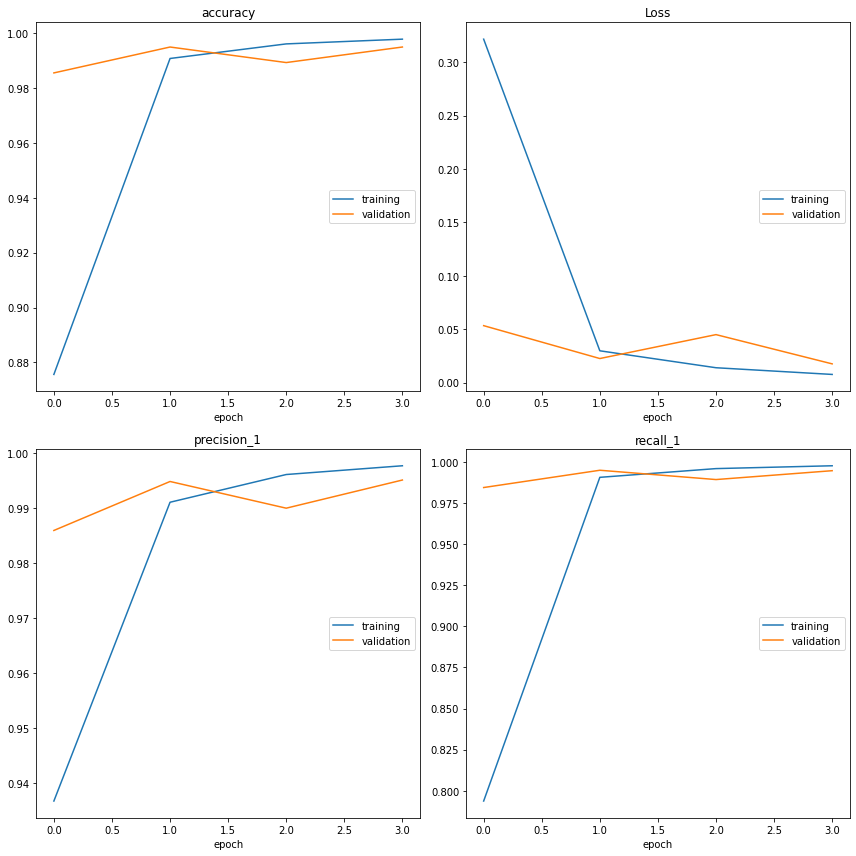

accuracy
	training         	 (min:    0.876, max:    0.998, cur:    0.998)
	validation       	 (min:    0.985, max:    0.995, cur:    0.995)
Loss
	training         	 (min:    0.008, max:    0.322, cur:    0.008)
	validation       	 (min:    0.018, max:    0.053, cur:    0.018)
precision_1
	training         	 (min:    0.937, max:    0.998, cur:    0.998)
	validation       	 (min:    0.986, max:    0.995, cur:    0.995)
recall_1
	training         	 (min:    0.794, max:    0.998, cur:    0.998)
	validation       	 (min:    0.984, max:    0.995, cur:    0.995)

Epoch 4: saving model to model2_weights.h5

Epoch 4: val_loss improved from 0.02252 to 0.01753, saving model to model2.h5
Restoring model weights from the end of the best epoch: 2.
236/236 [==============================] - 29s 123ms/step - loss: 0.0076 - accuracy: 0.9977 - precision_1: 0.9977 - recall_1: 0.9976 - val_loss: 0.0175 - val_accuracy: 0.9949 - val_precision_1: 0.9951 - val_recall_1: 0.9946 - lr: 0.0010
Epoch 4: early sto

In [ ]:
epochs = 10
batch_size = 32

checkpoint = tf.keras.callbacks.ModelCheckpoint("model2_weights.h5", monitor='val_accuracy',
                            save_weights_only = True,
                            mode = 'max',
                            verbose = 1)

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 2,
                          mode = 'max',
                          verbose = 1,
                          restore_best_weights = True)

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint("model2.h5", monitor='val_loss', verbose=1, save_best_only=True)


callbacks = [PlotLossesKerasTF(),checkpoint, lr_reducer, checkpointer, earlystop]

history = model2.fit(
    X_train,Y_train,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    validation_data=(X_test ,Y_test))

In [ ]:
train_pred=model2.predict(X_train).argmax(axis=1)
test_pred=model2.predict(X_test).argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_train.argmax(axis=1),train_pred,target_names = le.classes_))
print(classification_report(Y_test.argmax(axis=1),test_pred,target_names = le.classes_))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2526
     Neutral       1.00      1.00      1.00      2519
    Positive       1.00      1.00      1.00      2490

    accuracy                           1.00      7535
   macro avg       1.00      1.00      1.00      7535
weighted avg       1.00      1.00      1.00      7535

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      1223
     Neutral       0.98      1.00      0.99      1230
    Positive       1.00      0.98      0.99      1259

    accuracy                           0.99      3712
   macro avg       0.99      0.99      0.99      3712
weighted avg       0.99      0.99      0.99      3712



In [ ]:
le.classes_[model2.predict(newData_padded_seq)[21].astype(int).argmax()]

'Negative'

In [ ]:
test_data_hidden['reviews.text'][21]

'Needs to be a stand alone device. I should have not required to use a tablet of Cell phone to make it work. Amazon needs to work on the technology on device.'

In [ ]:
test_data_hidden['sentiment'][21]

'Negative'

In [ ]:
le.classes_[model2.predict(newData_padded_seq)[996].astype(int).argmax()]

'Negative'

In [ ]:
test_data_hidden['sentiment'][996]

'Neutral'

### **Its performance is same as that of LSTM.**